In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Batting Subclasses)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point directly inside Batting folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/Fielding", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Fielding", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Fielding", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

classes = train_ds.classes
print("Batting Subclasses:", classes)
print("Train samples:", len(train_ds), "Val samples:", len(val_ds), "Test samples:", len(test_ds))


Batting Subclasses: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Train samples: 1917 Val samples: 504 Test samples: 630


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)

Total training images: 1917
Total validation images: 504
Total test images: 630
Total images in dataset: 3051


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))

Training images (excluding 'random_occlusion'): 1704
Validation images (excluding 'random_occlusion'): 448
Test images (excluding 'random_occlusion'): 560
Total images (excluding 'random_occlusion'): 2712


In [4]:
ignore_folder = "random_occlusionw"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'random_occlusion', 'motion_blur', 'blur', 'lens_flare', 'chromatic_aberration', 'low_resolution', 'gaussian_noise', 'dirty_lens', 'original'}
Validation folders considered: {'random_occlusion', 'motion_blur', 'blur', 'lens_flare', 'chromatic_aberration', 'low_resolution', 'gaussian_noise', 'dirty_lens', 'original'}
Test folders considered: {'random_occlusion', 'motion_blur', 'blur', 'lens_flare', 'chromatic_aberration', 'low_resolution', 'gaussian_noise', 'dirty_lens', 'original'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Fielding", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Fielding", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Fielding", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))

Classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Final Training images: 1704
Final Validation images: 448
Final Test images: 560
Total images after filtering: 2712


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'motion_blur', 'blur', 'lens_flare', 'chromatic_aberration', 'low_resolution', 'gaussian_noise', 'dirty_lens', 'original'}
Validation folders considered: {'motion_blur', 'blur', 'lens_flare', 'chromatic_aberration', 'low_resolution', 'gaussian_noise', 'dirty_lens', 'original'}
Test folders considered: {'motion_blur', 'blur', 'lens_flare', 'chromatic_aberration', 'low_resolution', 'gaussian_noise', 'dirty_lens', 'original'}


In [7]:
import seaborn as sns
import numpy as np
import time
from tqdm import tqdm

In [8]:
# -----------------------------
# 2. Define ResNet50 Model from Scratch
# -----------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from tqdm import tqdm
import time

class Bottleneck(nn.Module):
    """Bottleneck block for ResNet50"""
    expansion = 4
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
    
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class MyResNet50(nn.Module):
    """ResNet50 Implementation from Scratch"""
    def __init__(self, num_classes=4, zero_init_residual=False):
        super().__init__()
        self.inplanes = 64
        
        # Initial convolution and pooling layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # Residual layers
        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)
        
        # Final layers
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * Bottleneck.expansion, num_classes)
        
        # Initialize weights
        self._initialize_weights(zero_init_residual)
    
    def _make_layer(self, planes, blocks, stride=1):
        """Create a residual layer with specified number of blocks"""
        downsample = None
        if stride != 1 or self.inplanes != planes * Bottleneck.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * Bottleneck.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * Bottleneck.expansion),
            )
        
        layers = []
        layers.append(Bottleneck(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * Bottleneck.expansion
        for _ in range(1, blocks):
            layers.append(Bottleneck(self.inplanes, planes))
        
        return nn.Sequential(*layers)
    
    def _initialize_weights(self, zero_init_residual):
        """Initialize weights using He initialization"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
        
        # Zero-initialize the last BN in each residual branch for better training
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

In [9]:
# -----------------------------
# 3. Training Setup
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyResNet50(num_classes=len(classes), zero_init_residual=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

print("ResNet50 Model Summary:")
try:
    summary(model, (3, 224, 224))
except:
    print("Model summary generation failed - this is normal for complex architectures")
    print(f"Model created successfully with {sum(p.numel() for p in model.parameters()):,} parameters")

ResNet50 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm


🚀 Starting ResNet50 Training for 50 epochs...

📈 Epoch 1/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:36<00:00,  1.46it/s, Loss=4.2185, Acc=0.2629]


✅ Training completed in 36.91s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.43it/s, Loss=1.9238, Acc=0.3371]


✅ Validation completed in 5.77s
🌟 New best ResNet50 model found! Validation Accuracy: 0.3371

📊 Epoch 1 Summary:
│ Train Loss: 4.2185 | Train Acc: 0.2629
│ Val Loss:   1.9238 | Val Acc:   0.3371
│ Train Time: 36.91s | Val Time: 5.77s
│ Total Epoch Time: 42.69s
│ Best Val Acc: 0.3371 (Epoch 1)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 2/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.91it/s, Loss=1.6099, Acc=0.3474]


✅ Training completed in 28.30s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.69it/s, Loss=1.4829, Acc=0.3594]


✅ Validation completed in 3.80s
🌟 New best ResNet50 model found! Validation Accuracy: 0.3594

📊 Epoch 2 Summary:
│ Train Loss: 1.6099 | Train Acc: 0.3474
│ Val Loss:   1.4829 | Val Acc:   0.3594
│ Train Time: 28.30s | Val Time: 3.80s
│ Total Epoch Time: 32.11s
│ Best Val Acc: 0.3594 (Epoch 2)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 3/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.87it/s, Loss=1.3808, Acc=0.4202]


✅ Training completed in 28.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.64it/s, Loss=1.5005, Acc=0.3705]


✅ Validation completed in 3.85s
🌟 New best ResNet50 model found! Validation Accuracy: 0.3705

📊 Epoch 3 Summary:
│ Train Loss: 1.3808 | Train Acc: 0.4202
│ Val Loss:   1.5005 | Val Acc:   0.3705
│ Train Time: 28.90s | Val Time: 3.85s
│ Total Epoch Time: 32.75s
│ Best Val Acc: 0.3705 (Epoch 3)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 4/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.85it/s, Loss=1.2646, Acc=0.4906]


✅ Training completed in 29.24s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.59it/s, Loss=1.6626, Acc=0.3929]


✅ Validation completed in 3.90s
🌟 New best ResNet50 model found! Validation Accuracy: 0.3929

📊 Epoch 4 Summary:
│ Train Loss: 1.2646 | Train Acc: 0.4906
│ Val Loss:   1.6626 | Val Acc:   0.3929
│ Train Time: 29.24s | Val Time: 3.90s
│ Total Epoch Time: 33.15s
│ Best Val Acc: 0.3929 (Epoch 4)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 5/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=1.1014, Acc=0.5540]


✅ Training completed in 30.10s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.54it/s, Loss=1.5422, Acc=0.3884]


✅ Validation completed in 3.96s

📊 Epoch 5 Summary:
│ Train Loss: 1.1014 | Train Acc: 0.5540
│ Val Loss:   1.5422 | Val Acc:   0.3884
│ Train Time: 30.10s | Val Time: 3.96s
│ Total Epoch Time: 34.07s
│ Best Val Acc: 0.3929 (Epoch 4)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 6/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.9165, Acc=0.6373]


✅ Training completed in 29.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.58it/s, Loss=1.9146, Acc=0.3527]


✅ Validation completed in 3.92s

📊 Epoch 6 Summary:
│ Train Loss: 0.9165 | Train Acc: 0.6373
│ Val Loss:   1.9146 | Val Acc:   0.3527
│ Train Time: 29.90s | Val Time: 3.92s
│ Total Epoch Time: 33.82s
│ Best Val Acc: 0.3929 (Epoch 4)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 7/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.7171, Acc=0.7160]


✅ Training completed in 29.79s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.61it/s, Loss=2.4068, Acc=0.4196]


✅ Validation completed in 3.88s
🌟 New best ResNet50 model found! Validation Accuracy: 0.4196

📊 Epoch 7 Summary:
│ Train Loss: 0.7171 | Train Acc: 0.7160
│ Val Loss:   2.4068 | Val Acc:   0.4196
│ Train Time: 29.79s | Val Time: 3.88s
│ Total Epoch Time: 33.68s
│ Best Val Acc: 0.4196 (Epoch 7)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 8/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.5265, Acc=0.8028]


✅ Training completed in 30.00s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.55it/s, Loss=1.9480, Acc=0.4107]


✅ Validation completed in 3.95s

📊 Epoch 8 Summary:
│ Train Loss: 0.5265 | Train Acc: 0.8028
│ Val Loss:   1.9480 | Val Acc:   0.4107
│ Train Time: 30.00s | Val Time: 3.95s
│ Total Epoch Time: 33.95s
│ Best Val Acc: 0.4196 (Epoch 7)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 9/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.80it/s, Loss=0.3673, Acc=0.8656]


✅ Training completed in 30.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=2.4936, Acc=0.4732]


✅ Validation completed in 3.93s
🌟 New best ResNet50 model found! Validation Accuracy: 0.4732

📊 Epoch 9 Summary:
│ Train Loss: 0.3673 | Train Acc: 0.8656
│ Val Loss:   2.4936 | Val Acc:   0.4732
│ Train Time: 30.05s | Val Time: 3.93s
│ Total Epoch Time: 33.99s
│ Best Val Acc: 0.4732 (Epoch 9)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 10/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.3377, Acc=0.8685]


✅ Training completed in 30.15s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.59it/s, Loss=2.0784, Acc=0.4308]


✅ Validation completed in 3.90s

📊 Epoch 10 Summary:
│ Train Loss: 0.3377 | Train Acc: 0.8685
│ Val Loss:   2.0784 | Val Acc:   0.4308
│ Train Time: 30.15s | Val Time: 3.90s
│ Total Epoch Time: 34.05s
│ Best Val Acc: 0.4732 (Epoch 9)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 11/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.2907, Acc=0.8885]


✅ Training completed in 29.95s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.59it/s, Loss=2.4130, Acc=0.4799]


✅ Validation completed in 3.91s
🌟 New best ResNet50 model found! Validation Accuracy: 0.4799

📊 Epoch 11 Summary:
│ Train Loss: 0.2907 | Train Acc: 0.8885
│ Val Loss:   2.4130 | Val Acc:   0.4799
│ Train Time: 29.95s | Val Time: 3.91s
│ Total Epoch Time: 33.86s
│ Best Val Acc: 0.4799 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 12/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.1805, Acc=0.9319]


✅ Training completed in 29.97s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=2.6032, Acc=0.4777]


✅ Validation completed in 3.94s

📊 Epoch 12 Summary:
│ Train Loss: 0.1805 | Train Acc: 0.9319
│ Val Loss:   2.6032 | Val Acc:   0.4777
│ Train Time: 29.97s | Val Time: 3.94s
│ Total Epoch Time: 33.92s
│ Best Val Acc: 0.4799 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 13/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.0995, Acc=0.9689]


✅ Training completed in 30.12s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.48it/s, Loss=2.6447, Acc=0.4420]


✅ Validation completed in 4.03s

📊 Epoch 13 Summary:
│ Train Loss: 0.0995 | Train Acc: 0.9689
│ Val Loss:   2.6447 | Val Acc:   0.4420
│ Train Time: 30.12s | Val Time: 4.03s
│ Total Epoch Time: 34.15s
│ Best Val Acc: 0.4799 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 14/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.1484, Acc=0.9525]


✅ Training completed in 29.87s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.58it/s, Loss=2.7049, Acc=0.3996]


✅ Validation completed in 3.92s

📊 Epoch 14 Summary:
│ Train Loss: 0.1484 | Train Acc: 0.9525
│ Val Loss:   2.7049 | Val Acc:   0.3996
│ Train Time: 29.87s | Val Time: 3.92s
│ Total Epoch Time: 33.79s
│ Best Val Acc: 0.4799 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 15/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.0818, Acc=0.9730]


✅ Training completed in 29.89s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.48it/s, Loss=2.5955, Acc=0.4665]


✅ Validation completed in 4.03s

📊 Epoch 15 Summary:
│ Train Loss: 0.0818 | Train Acc: 0.9730
│ Val Loss:   2.5955 | Val Acc:   0.4665
│ Train Time: 29.89s | Val Time: 4.03s
│ Total Epoch Time: 33.93s
│ Best Val Acc: 0.4799 (Epoch 11)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 16/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.80it/s, Loss=0.0536, Acc=0.9824]


✅ Training completed in 30.03s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.57it/s, Loss=2.5252, Acc=0.5268]


✅ Validation completed in 3.93s
🌟 New best ResNet50 model found! Validation Accuracy: 0.5268

📊 Epoch 16 Summary:
│ Train Loss: 0.0536 | Train Acc: 0.9824
│ Val Loss:   2.5252 | Val Acc:   0.5268
│ Train Time: 30.03s | Val Time: 3.93s
│ Total Epoch Time: 33.97s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 17/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.0404, Acc=0.9877]


✅ Training completed in 30.00s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.45it/s, Loss=2.6580, Acc=0.5089]


✅ Validation completed in 4.07s

📊 Epoch 17 Summary:
│ Train Loss: 0.0404 | Train Acc: 0.9877
│ Val Loss:   2.6580 | Val Acc:   0.5089
│ Train Time: 30.00s | Val Time: 4.07s
│ Total Epoch Time: 34.07s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 18/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.0649, Acc=0.9800]


✅ Training completed in 30.24s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=3.2183, Acc=0.4799]


✅ Validation completed in 3.94s

📊 Epoch 18 Summary:
│ Train Loss: 0.0649 | Train Acc: 0.9800
│ Val Loss:   3.2183 | Val Acc:   0.4799
│ Train Time: 30.24s | Val Time: 3.94s
│ Total Epoch Time: 34.18s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 19/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.1179, Acc=0.9607]


✅ Training completed in 30.19s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=2.7552, Acc=0.5156]


✅ Validation completed in 3.94s

📊 Epoch 19 Summary:
│ Train Loss: 0.1179 | Train Acc: 0.9607
│ Val Loss:   2.7552 | Val Acc:   0.5156
│ Train Time: 30.19s | Val Time: 3.94s
│ Total Epoch Time: 34.13s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 20/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.0317, Acc=0.9900]


✅ Training completed in 30.17s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.37it/s, Loss=2.6805, Acc=0.5268]


✅ Validation completed in 4.16s

📊 Epoch 20 Summary:
│ Train Loss: 0.0317 | Train Acc: 0.9900
│ Val Loss:   2.6805 | Val Acc:   0.5268
│ Train Time: 30.17s | Val Time: 4.16s
│ Total Epoch Time: 34.33s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 21/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.77it/s, Loss=0.0115, Acc=0.9977]


✅ Training completed in 30.50s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.47it/s, Loss=2.6122, Acc=0.5201]


✅ Validation completed in 4.04s

📊 Epoch 21 Summary:
│ Train Loss: 0.0115 | Train Acc: 0.9977
│ Val Loss:   2.6122 | Val Acc:   0.5201
│ Train Time: 30.50s | Val Time: 4.04s
│ Total Epoch Time: 34.55s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 22/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0081, Acc=0.9982]


✅ Training completed in 30.27s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.45it/s, Loss=3.0315, Acc=0.5000]


✅ Validation completed in 4.06s

📊 Epoch 22 Summary:
│ Train Loss: 0.0081 | Train Acc: 0.9982
│ Val Loss:   3.0315 | Val Acc:   0.5000
│ Train Time: 30.27s | Val Time: 4.06s
│ Total Epoch Time: 34.33s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 23/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0078, Acc=0.9994]


✅ Training completed in 30.28s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.51it/s, Loss=2.8114, Acc=0.5089]


✅ Validation completed in 3.99s

📊 Epoch 23 Summary:
│ Train Loss: 0.0078 | Train Acc: 0.9994
│ Val Loss:   2.8114 | Val Acc:   0.5089
│ Train Time: 30.28s | Val Time: 3.99s
│ Total Epoch Time: 34.28s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 24/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0069, Acc=0.9988]


✅ Training completed in 30.31s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.54it/s, Loss=2.9527, Acc=0.4598]


✅ Validation completed in 3.97s

📊 Epoch 24 Summary:
│ Train Loss: 0.0069 | Train Acc: 0.9988
│ Val Loss:   2.9527 | Val Acc:   0.4598
│ Train Time: 30.31s | Val Time: 3.97s
│ Total Epoch Time: 34.28s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 25/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.0178, Acc=0.9977]


✅ Training completed in 29.91s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.50it/s, Loss=3.1194, Acc=0.5067]


✅ Validation completed in 4.01s

📊 Epoch 25 Summary:
│ Train Loss: 0.0178 | Train Acc: 0.9977
│ Val Loss:   3.1194 | Val Acc:   0.5067
│ Train Time: 29.91s | Val Time: 4.01s
│ Total Epoch Time: 33.92s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 26/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.0361, Acc=0.9888]


✅ Training completed in 30.18s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.61it/s, Loss=3.0756, Acc=0.5089]


✅ Validation completed in 3.88s

📊 Epoch 26 Summary:
│ Train Loss: 0.0361 | Train Acc: 0.9888
│ Val Loss:   3.0756 | Val Acc:   0.5089
│ Train Time: 30.18s | Val Time: 3.88s
│ Total Epoch Time: 34.07s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 27/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0227, Acc=0.9941]


✅ Training completed in 30.28s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.50it/s, Loss=2.8987, Acc=0.5067]


✅ Validation completed in 4.01s

📊 Epoch 27 Summary:
│ Train Loss: 0.0227 | Train Acc: 0.9941
│ Val Loss:   2.8987 | Val Acc:   0.5067
│ Train Time: 30.28s | Val Time: 4.01s
│ Total Epoch Time: 34.28s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 28/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.77it/s, Loss=0.0614, Acc=0.9795]


✅ Training completed in 30.51s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.45it/s, Loss=3.2889, Acc=0.4598]


✅ Validation completed in 4.06s

📊 Epoch 28 Summary:
│ Train Loss: 0.0614 | Train Acc: 0.9795
│ Val Loss:   3.2889 | Val Acc:   0.4598
│ Train Time: 30.51s | Val Time: 4.06s
│ Total Epoch Time: 34.58s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 29/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.77it/s, Loss=0.0372, Acc=0.9894]


✅ Training completed in 30.43s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.52it/s, Loss=3.1718, Acc=0.5156]


✅ Validation completed in 3.97s

📊 Epoch 29 Summary:
│ Train Loss: 0.0372 | Train Acc: 0.9894
│ Val Loss:   3.1718 | Val Acc:   0.5156
│ Train Time: 30.43s | Val Time: 3.97s
│ Total Epoch Time: 34.40s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 30/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0168, Acc=0.9953]


✅ Training completed in 30.33s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.54it/s, Loss=2.7643, Acc=0.5000]


✅ Validation completed in 3.96s

📊 Epoch 30 Summary:
│ Train Loss: 0.0168 | Train Acc: 0.9953
│ Val Loss:   2.7643 | Val Acc:   0.5000
│ Train Time: 30.33s | Val Time: 3.96s
│ Total Epoch Time: 34.29s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 31/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.77it/s, Loss=0.0039, Acc=0.9994]


✅ Training completed in 30.52s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.49it/s, Loss=2.9682, Acc=0.4754]


✅ Validation completed in 4.02s

📊 Epoch 31 Summary:
│ Train Loss: 0.0039 | Train Acc: 0.9994
│ Val Loss:   2.9682 | Val Acc:   0.4754
│ Train Time: 30.52s | Val Time: 4.02s
│ Total Epoch Time: 34.54s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 32/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0463, Acc=0.9947]


✅ Training completed in 30.34s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.53it/s, Loss=3.3786, Acc=0.4621]


✅ Validation completed in 3.97s

📊 Epoch 32 Summary:
│ Train Loss: 0.0463 | Train Acc: 0.9947
│ Val Loss:   3.3786 | Val Acc:   0.4621
│ Train Time: 30.34s | Val Time: 3.97s
│ Total Epoch Time: 34.32s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 33/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.77it/s, Loss=0.2387, Acc=0.9208]


✅ Training completed in 30.45s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.47it/s, Loss=3.5168, Acc=0.4308]


✅ Validation completed in 4.03s

📊 Epoch 33 Summary:
│ Train Loss: 0.2387 | Train Acc: 0.9208
│ Val Loss:   3.5168 | Val Acc:   0.4308
│ Train Time: 30.45s | Val Time: 4.03s
│ Total Epoch Time: 34.49s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 34/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.0314, Acc=0.9930]


✅ Training completed in 30.20s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.52it/s, Loss=2.7655, Acc=0.4621]


✅ Validation completed in 3.99s

📊 Epoch 34 Summary:
│ Train Loss: 0.0314 | Train Acc: 0.9930
│ Val Loss:   2.7655 | Val Acc:   0.4621
│ Train Time: 30.20s | Val Time: 3.99s
│ Total Epoch Time: 34.18s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 35/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.76it/s, Loss=0.0104, Acc=0.9982]


✅ Training completed in 30.71s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.53it/s, Loss=2.7837, Acc=0.4710]


✅ Validation completed in 3.97s

📊 Epoch 35 Summary:
│ Train Loss: 0.0104 | Train Acc: 0.9982
│ Val Loss:   2.7837 | Val Acc:   0.4710
│ Train Time: 30.71s | Val Time: 3.97s
│ Total Epoch Time: 34.68s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 36/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0100, Acc=0.9977]


✅ Training completed in 30.41s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.44it/s, Loss=3.1285, Acc=0.4732]


✅ Validation completed in 4.07s

📊 Epoch 36 Summary:
│ Train Loss: 0.0100 | Train Acc: 0.9977
│ Val Loss:   3.1285 | Val Acc:   0.4732
│ Train Time: 30.41s | Val Time: 4.07s
│ Total Epoch Time: 34.48s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 37/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0056, Acc=0.9988]


✅ Training completed in 30.36s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.53it/s, Loss=2.7725, Acc=0.4911]


✅ Validation completed in 3.97s

📊 Epoch 37 Summary:
│ Train Loss: 0.0056 | Train Acc: 0.9988
│ Val Loss:   2.7725 | Val Acc:   0.4911
│ Train Time: 30.36s | Val Time: 3.97s
│ Total Epoch Time: 34.34s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 38/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.80it/s, Loss=0.0034, Acc=1.0000]


✅ Training completed in 30.06s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.55it/s, Loss=2.8036, Acc=0.5000]


✅ Validation completed in 3.94s

📊 Epoch 38 Summary:
│ Train Loss: 0.0034 | Train Acc: 1.0000
│ Val Loss:   2.8036 | Val Acc:   0.5000
│ Train Time: 30.06s | Val Time: 3.94s
│ Total Epoch Time: 34.00s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 39/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.0013, Acc=1.0000]


✅ Training completed in 30.21s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.52it/s, Loss=2.7312, Acc=0.4978]


✅ Validation completed in 3.98s

📊 Epoch 39 Summary:
│ Train Loss: 0.0013 | Train Acc: 1.0000
│ Val Loss:   2.7312 | Val Acc:   0.4978
│ Train Time: 30.21s | Val Time: 3.98s
│ Total Epoch Time: 34.20s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 40/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0012, Acc=1.0000]


✅ Training completed in 30.40s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.54it/s, Loss=2.6211, Acc=0.5156]


✅ Validation completed in 3.95s

📊 Epoch 40 Summary:
│ Train Loss: 0.0012 | Train Acc: 1.0000
│ Val Loss:   2.6211 | Val Acc:   0.5156
│ Train Time: 30.40s | Val Time: 3.95s
│ Total Epoch Time: 34.35s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 41/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.0005, Acc=1.0000]


✅ Training completed in 29.98s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.62it/s, Loss=2.6319, Acc=0.5179]


✅ Validation completed in 3.87s

📊 Epoch 41 Summary:
│ Train Loss: 0.0005 | Train Acc: 1.0000
│ Val Loss:   2.6319 | Val Acc:   0.5179
│ Train Time: 29.98s | Val Time: 3.87s
│ Total Epoch Time: 33.85s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 42/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.79it/s, Loss=0.0003, Acc=1.0000]


✅ Training completed in 30.25s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=2.6294, Acc=0.4978]


✅ Validation completed in 3.94s

📊 Epoch 42 Summary:
│ Train Loss: 0.0003 | Train Acc: 1.0000
│ Val Loss:   2.6294 | Val Acc:   0.4978
│ Train Time: 30.25s | Val Time: 3.94s
│ Total Epoch Time: 34.19s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 43/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.80it/s, Loss=0.0013, Acc=1.0000]


✅ Training completed in 30.04s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.63it/s, Loss=2.7212, Acc=0.5112]


✅ Validation completed in 3.87s

📊 Epoch 43 Summary:
│ Train Loss: 0.0013 | Train Acc: 1.0000
│ Val Loss:   2.7212 | Val Acc:   0.5112
│ Train Time: 30.04s | Val Time: 3.87s
│ Total Epoch Time: 33.91s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 44/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.80it/s, Loss=0.0007, Acc=1.0000]


✅ Training completed in 30.07s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.62it/s, Loss=2.6706, Acc=0.4933]


✅ Validation completed in 3.87s

📊 Epoch 44 Summary:
│ Train Loss: 0.0007 | Train Acc: 1.0000
│ Val Loss:   2.6706 | Val Acc:   0.4933
│ Train Time: 30.07s | Val Time: 3.87s
│ Total Epoch Time: 33.95s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 45/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0011, Acc=0.9994]


✅ Training completed in 30.39s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.61it/s, Loss=2.8093, Acc=0.4621]


✅ Validation completed in 3.89s

📊 Epoch 45 Summary:
│ Train Loss: 0.0011 | Train Acc: 0.9994
│ Val Loss:   2.8093 | Val Acc:   0.4621
│ Train Time: 30.39s | Val Time: 3.89s
│ Total Epoch Time: 34.28s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 46/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0016, Acc=1.0000]


✅ Training completed in 30.38s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.54it/s, Loss=2.7500, Acc=0.4688]


✅ Validation completed in 3.96s

📊 Epoch 46 Summary:
│ Train Loss: 0.0016 | Train Acc: 1.0000
│ Val Loss:   2.7500 | Val Acc:   0.4688
│ Train Time: 30.38s | Val Time: 3.96s
│ Total Epoch Time: 34.35s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 47/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.78it/s, Loss=0.0070, Acc=0.9988]


✅ Training completed in 30.34s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.44it/s, Loss=2.7896, Acc=0.4799]


✅ Validation completed in 4.08s

📊 Epoch 47 Summary:
│ Train Loss: 0.0070 | Train Acc: 0.9988
│ Val Loss:   2.7896 | Val Acc:   0.4799
│ Train Time: 30.34s | Val Time: 4.08s
│ Total Epoch Time: 34.42s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 48/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.0248, Acc=0.9924]


✅ Training completed in 29.96s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.54it/s, Loss=2.8947, Acc=0.4710]


✅ Validation completed in 3.97s

📊 Epoch 48 Summary:
│ Train Loss: 0.0248 | Train Acc: 0.9924
│ Val Loss:   2.8947 | Val Acc:   0.4710
│ Train Time: 29.96s | Val Time: 3.97s
│ Total Epoch Time: 33.93s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 49/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.80it/s, Loss=0.0176, Acc=0.9988]


✅ Training completed in 30.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.55it/s, Loss=2.5690, Acc=0.4821]


✅ Validation completed in 3.95s

📊 Epoch 49 Summary:
│ Train Loss: 0.0176 | Train Acc: 0.9988
│ Val Loss:   2.5690 | Val Acc:   0.4821
│ Train Time: 30.05s | Val Time: 3.95s
│ Total Epoch Time: 34.00s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

📈 Epoch 50/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.0823, Acc=0.9736]


✅ Training completed in 29.96s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.62it/s, Loss=3.0663, Acc=0.4330]


✅ Validation completed in 3.87s

📊 Epoch 50 Summary:
│ Train Loss: 0.0823 | Train Acc: 0.9736
│ Val Loss:   3.0663 | Val Acc:   0.4330
│ Train Time: 29.96s | Val Time: 3.87s
│ Total Epoch Time: 33.84s
│ Best Val Acc: 0.5268 (Epoch 16)
│ GPU Memory: 0.3GB / 3.2GB

💾 Best ResNet50 model saved as 'best_resnet50_model.pth'
📊 Best model stats:
│ Best Epoch: 16
│ Best Val Acc: 0.5268

💾 ResNet50 training history saved to 'resnet50_training_history.csv'

🎉 ResNet50 Training Complete!
Total Training Time: 1711.90s (28.5 minutes)
Average Epoch Time: 34.24s

⏱️  Epoch Timing Breakdown:
│ Epoch 1: 42.69s
│ Epoch 2: 32.11s
│ Epoch 3: 32.75s
│ Epoch 4: 33.15s
│ Epoch 5: 34.07s
│ Epoch 6: 33.82s
│ Epoch 7: 33.68s
│ Epoch 8: 33.95s
│ Epoch 9: 33.99s
│ Epoch 10: 34.05s
│ Epoch 11: 33.86s
│ Epoch 12: 33.92s
│ Epoch 13: 34.15s
│ Epoch 14: 33.79s
│ Epoch 15: 33.93s
│ Epoch 16: 33.97s
│ Epoch 17: 34.07s
│ Epoch 18: 34.18s
│ Epoch 19: 34.13s
│ Epoch 20: 34.33s
│ Epoch 21: 34.55s
│ Epoch 22: 34.33s
│ Epoch 

Testing ResNet50: 100%|██████████████████████████████| 18/18 [00:08<00:00,  2.11it/s]


✅ ResNet50 Testing completed in 8.55s

📋 ResNet50 Classification Report:
                 precision    recall  f1-score   support

  boundary_save     0.5857    0.5395    0.5616       152
catching_a_ball     0.2697    0.3942    0.3203       104
    diving_stop     0.0000    0.0000    0.0000        56
        run_out     0.4752    0.5234    0.4981       128
       stumping     0.5536    0.5167    0.5345       120

       accuracy                         0.4500       560
      macro avg     0.3768    0.3948    0.3829       560
   weighted avg     0.4363    0.4500    0.4403       560

🎯 ResNet50 Test Accuracy: 0.4500

📊 ResNet50 Model Performance Summary:
│ Best Validation Acc:  0.5268 (Epoch 16)
│ Final Test Accuracy:  0.4500
│ Val-Test Gap:         0.0768


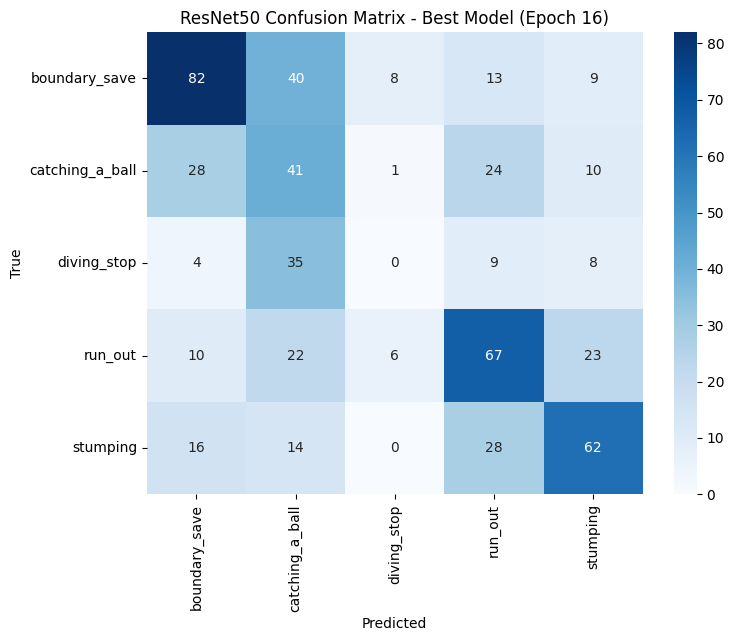

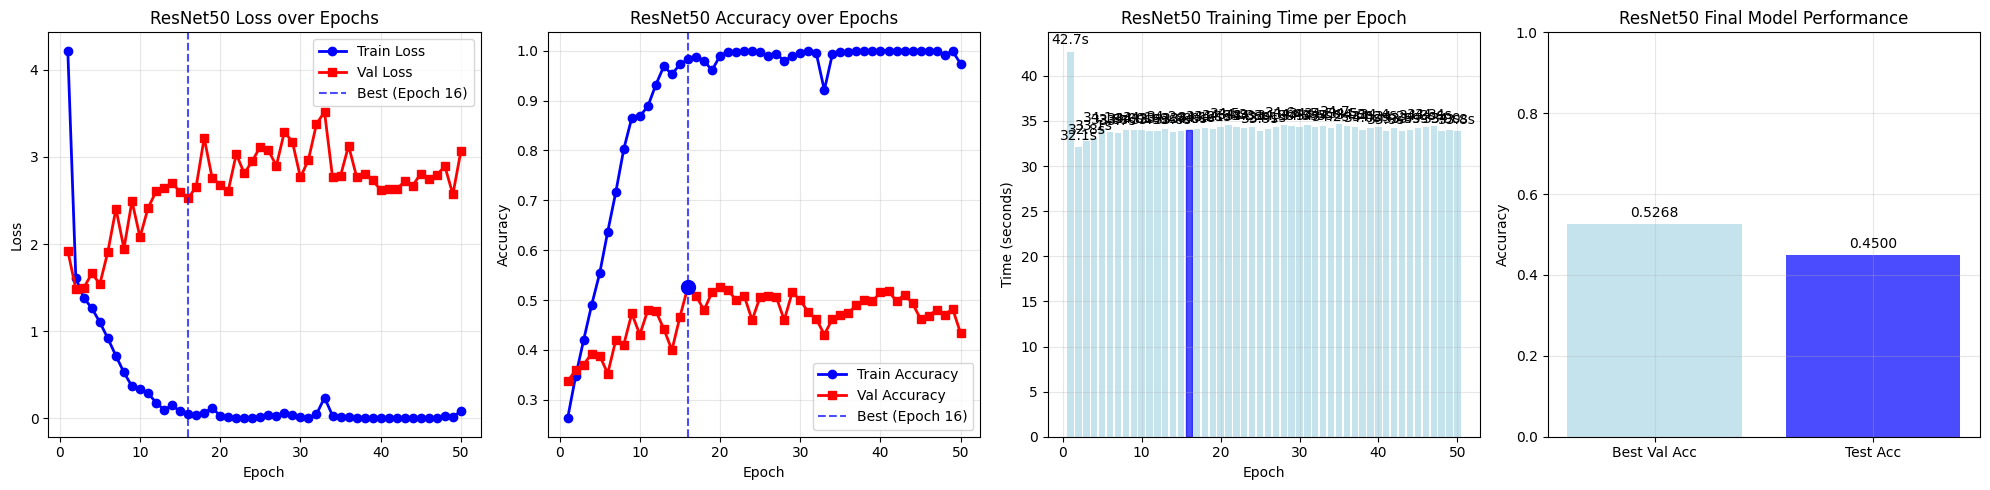


⏰ ResNet50 Final Timing Summary:
│ Total Training: 1711.90s
│ Average per Epoch: 34.24s
│ Testing Time: 8.55s
│ Total Runtime: 1720.45s

💾 ResNet50 Files saved:
│ best_resnet50_model.pth - Best validation accuracy model
│ resnet50_training_history.csv - Training metrics for later plotting

🏗️  ResNet50 Architecture Summary:
│ Total Parameters: 23,518,277
│ Trainable Parameters: 23,518,277
│ Model Size: 89.72 MB
│ Input Size: 224x224x3
│ Output Classes: 5
│ Architecture: ResNet50
│ Block Type: Bottleneck
│ Layers: [3, 4, 6, 3]
│ Skip Connections: Yes
│ Batch Normalization: Yes
│ Activation: ReLU
│ Zero Init Residual: Yes


In [10]:
# -----------------------------
# 4. Training Loop with Best Model Saving (Val Accuracy) - ResNet50
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking
best_val_acc = 0.0
best_model_state = None
best_epoch = 0

print(f"\n🚀 Starting ResNet50 Training for {epochs} epochs...")
print("=" * 80)

total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\n📈 Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("🔄 Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc=f"Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"✅ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("🔍 Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc=f"Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"✅ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model so far based on val_acc
    is_best = val_acc > best_val_acc
    if is_best:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"🌟 New best ResNet50 model found! Validation Accuracy: {val_acc:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"│ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"│ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"│ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"│ Total Epoch Time: {epoch_time:.2f}s")
    print(f"│ Best Val Acc: {best_val_acc:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"│ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_resnet50_model.pth')
    print(f"\n💾 Best ResNet50 model saved as 'best_resnet50_model.pth'")
    print(f"📊 Best model stats:")
    print(f"│ Best Epoch: {best_epoch}")
    print(f"│ Best Val Acc: {best_val_acc:.4f}")

# Save training history data to CSV
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}
history_df = pd.DataFrame(history_data)
history_df.to_csv('resnet50_training_history.csv', index=False)
print("\n💾 ResNet50 training history saved to 'resnet50_training_history.csv'")

# Training Summary
print(f"\n🎉 ResNet50 Training Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")
print("\n⏱️  Epoch Timing Breakdown:")
for i, t in enumerate(epoch_times):
    print(f"│ Epoch {i+1}: {t:.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\n🧪 Loading Best ResNet50 Model for Testing...")

# Load the best model state
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Best ResNet50 model from epoch {best_epoch} loaded successfully!")
else:
    print("⚠️  No best model found, using current model state")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()

test_pbar = tqdm(test_loader, desc="Testing ResNet50", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"✅ ResNet50 Testing completed in {test_time:.2f}s")
print("\n📋 ResNet50 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes,digits=4))
print(f"🎯 ResNet50 Test Accuracy: {test_accuracy:.4f}")

# Model Performance Summary
print(f"\n📊 ResNet50 Model Performance Summary:")
print(f"│ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"│ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"│ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"ResNet50 Confusion Matrix - Best Model (Epoch {best_epoch})")
plt.show()

# -----------------------------
# 6. Enhanced Visualizations
# -----------------------------
plt.figure(figsize=(20, 5))

# Loss Plot
plt.subplot(1, 4, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.legend()
plt.title("ResNet50 Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 4, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='blue', s=100, zorder=5)
plt.legend()
plt.title("ResNet50 Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Timing Plot
plt.subplot(1, 4, 3)
bars = plt.bar(range(1, epochs+1), epoch_times, color='lightblue', alpha=0.7)
bars[best_epoch-1].set_color('blue')
plt.title("ResNet50 Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, alpha=0.3)
for i, t in enumerate(epoch_times):
    plt.text(i+1, t+0.5, f'{t:.1f}s', ha='center', va='bottom')

# Performance Comparison
plt.subplot(1, 4, 4)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['lightblue', 'blue']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("ResNet50 Final Model Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n⏰ ResNet50 Final Timing Summary:")
print(f"│ Total Training: {total_training_time:.2f}s")
print(f"│ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"│ Testing Time: {test_time:.2f}s")
print(f"│ Total Runtime: {total_training_time + test_time:.2f}s")

print(f"\n💾 ResNet50 Files saved:")
print(f"│ best_resnet50_model.pth - Best validation accuracy model")
print(f"│ resnet50_training_history.csv - Training metrics for later plotting")

# -----------------------------
# 7. ResNet50 Architecture Summary
# -----------------------------
print(f"\n🏗️  ResNet50 Architecture Summary:")
print(f"│ Total Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"│ Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"│ Model Size: {sum(p.numel() * p.element_size() for p in model.parameters()) / 1024**2:.2f} MB")
print(f"│ Input Size: 224x224x3")
print(f"│ Output Classes: {len(classes)}")
print(f"│ Architecture: ResNet50")
print(f"│ Block Type: Bottleneck")
print(f"│ Layers: [3, 4, 6, 3]")
print(f"│ Skip Connections: Yes")
print(f"│ Batch Normalization: Yes")
print(f"│ Activation: ReLU")
print(f"│ Zero Init Residual: Yes")


In [11]:
import pandas as pd
df=pd.read_csv("/kaggle/working/resnet50_training_history.csv")
df

,epoch,train_loss,val_loss,train_acc,val_acc,epoch_time
0,1,4.218463,1.923778,0.262911,0.337054,42.694518
1,2,1.609930,1.482944,0.347418,0.359375,32.106103
2,3,1.380802,1.500518,0.420188,0.370536,32.754009
3,4,1.264560,1.662564,0.490610,0.392857,33.146460
4,5,1.101422,1.542218,0.553991,0.388393,34.066262
5,6,0.916538,1.914580,0.637324,0.352679,33.822953
6,7,0.717050,2.406795,0.715962,0.419643,33.681445
7,8,0.526478,1.948031,0.802817,0.410714,33.953762
8,9,0.367276,2.493594,0.865610,0.473214,33.993648
9,10,0.337676,2.078352,0.868545,0.430804,34.054441
